In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.0 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO

model = YOLO("yolo12n.pt")

results = model.train(data="/content/drive/MyDrive/Capstone_Project/SOD-SSS-5/data.yaml", epochs=100, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Capstone_Project/SOD-SSS-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=6

In [5]:
import pandas as pd

model = YOLO("/content/runs/detect/train/weights/best.pt")

results = model.val(data="/content/drive/MyDrive/Capstone_Project/SOD-SSS-5/data.yaml")


precision = results.box.p  # list of precision scores per class
recall = results.box.r     # list of recall scores per class
f1_scores = results.box.f1 # list of F1 scores per class
maps = results.box.maps    # list of mAP per class
class_names = [model.names[i] for i in results.ap_class_index]

df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1': f1_scores,
    'mAP': maps
})

df.to_csv('metrics_per_class.csv', index=False)

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 6.1±6.6 MB/s, size: 29.6 KB)
val: Scanning /content/drive/MyDrive/Capstone_Project/SOD-SSS-5/valid/labels.cache... 89 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 89/89 120.9Kit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 37, len(boxes) = 89. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 2.2it/s 2.7s
                   all         89         89      0.757      0.775      0.807      0.511
Speed: 5.5ms preprocess, 7.6ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content


image 1/1 /content/drive/MyDrive/Capstone_Project/SOD-SSS-5/test/images/10299_bmp.rf.31e5d2ca0b7e0dd7b33b7f35566cdf72.jpg: 640x640 1 Weapons, 14.6ms
Speed: 1.8ms preprocess, 14.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


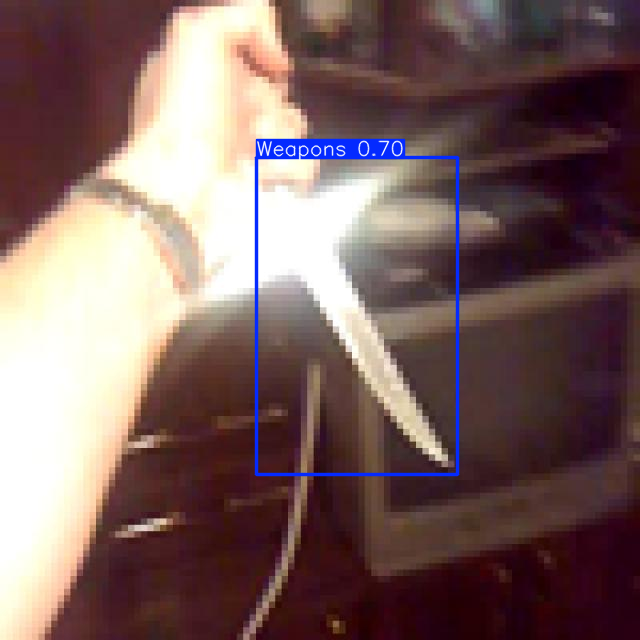

'results_10299_bmp.rf.31e5d2ca0b7e0dd7b33b7f35566cdf72.jpg'

In [13]:
results = model('/content/drive/MyDrive/Capstone_Project/SOD-SSS-5/test/images/10299_bmp.rf.31e5d2ca0b7e0dd7b33b7f35566cdf72.jpg')

results[0].show()
results[0].save()